## Tree based model in Python and practical considerations

In the lecture we have introduced the tree-based model. We have also mentioned the ensemble methods to solve the high variance problem in the decision tree, which lead to bagging and boosting. Here is a quick summary.

Decision Trees:
- Decision trees are the fundamental building blocks of tree-based models.
- They consist of internal nodes, representing feature tests, and leaf nodes, representing class labels or regression values.
- Decision trees recursively split the feature space based on certain criteria (e.g., entropy, Gini impurity) to create partitions.

Ensemble Methods:
- Tree-based models often utilize ensemble methods to improve performance and reduce overfitting.
- Random Forest: Constructs an ensemble of decision trees and aggregates their predictions through majority voting (classification) or averaging (regression).
- AdaBoost: Trains decision trees sequentially, with each subsequent tree focusing on correcting the mistakes of its predecessors.

Advantages:
- Tree-based models are capable of capturing complex relationships and interactions between features.
- They can handle both numerical and categorical features without requiring explicit feature engineering.
- Tree-based models provide interpretable results through feature importance and decision paths (for decision trees).
- Tree-based models can handle missing values by utilizing surrogate splits or treating them as a separate category.
- They can handle outliers effectively by creating splits that minimize impurity.
- Tree-based models are also robust to irrelevant features due to the nature of splitting based on impurity measures.

Limitations:

- Decision trees can suffer from overfitting when the tree becomes too complex, leading to poor generalization.
- Tree-based models may struggle with extrapolation, as they tend to make predictions within the range of the training data.
- Interpreting the exact relationships between features can be challenging in more complex tree structures.

In this code demostration, we will highlight a couple of things when you apply tree-based model to real life models, including:

- Fit decision tree and visualize the model
- Fit random forest and adaBoost, and generate proper metrics
- Preprocessing and hyperparameter tuning if necessary
- Imbalanced datasets


In [ ]:
#### Example 1: Wine data with decision tree

In [1]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the Wine dataset
wine = load_wine()

print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

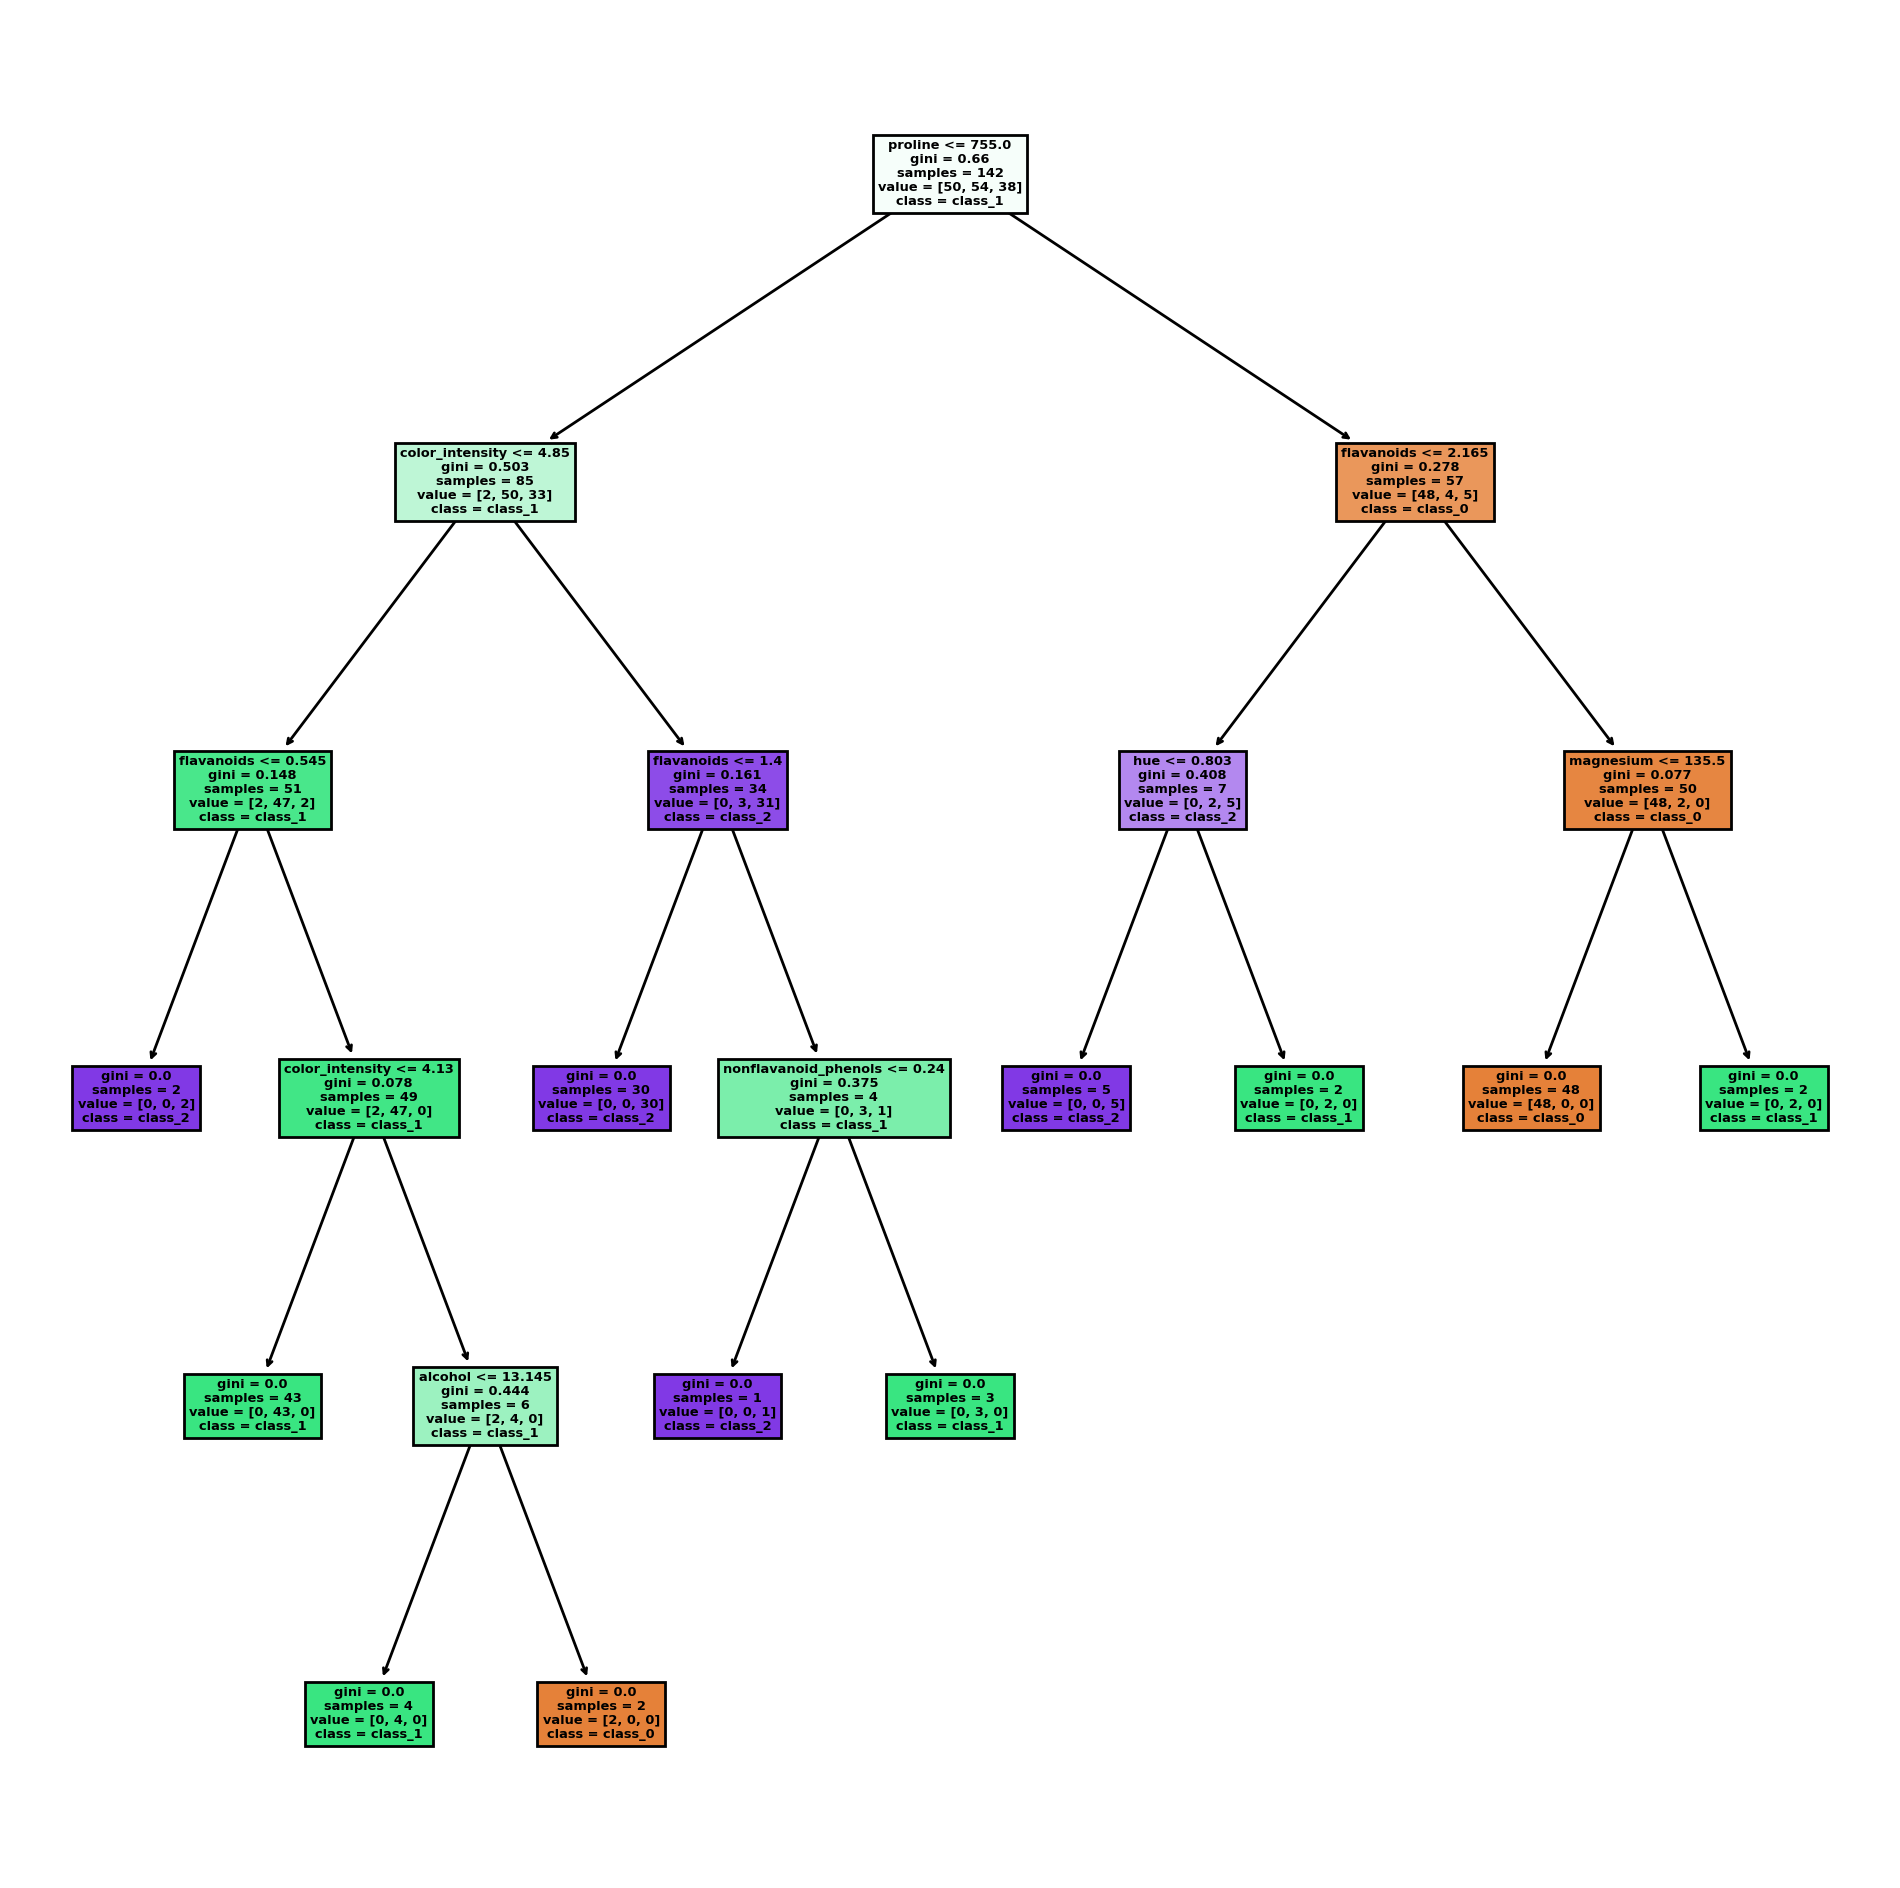

In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=4400)

# Create a decision tree classifier
tree = DecisionTreeClassifier()

# Fit the decision tree model to the training data
tree.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12,12), dpi=200)
plot_tree(tree, filled=True, feature_names=wine.feature_names,
          class_names=wine.target_names)
plt.show()

In [10]:
from sklearn.metrics import accuracy_score

tree_prediction = tree.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_prediction)
print(tree_accuracy)

0.9166666666666666


#### Example 2: Wine data with random forest and adaboost

In [11]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Create and fit a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=4400)
rf.fit(X_train, y_train)

# Make predictions using the Random Forest classifier
rf_pred = rf.predict(X_test)

# Calculate accuracy of the Random Forest classifier
rf_accuracy = accuracy_score(y_test, rf_pred)
print(rf_accuracy)

1.0


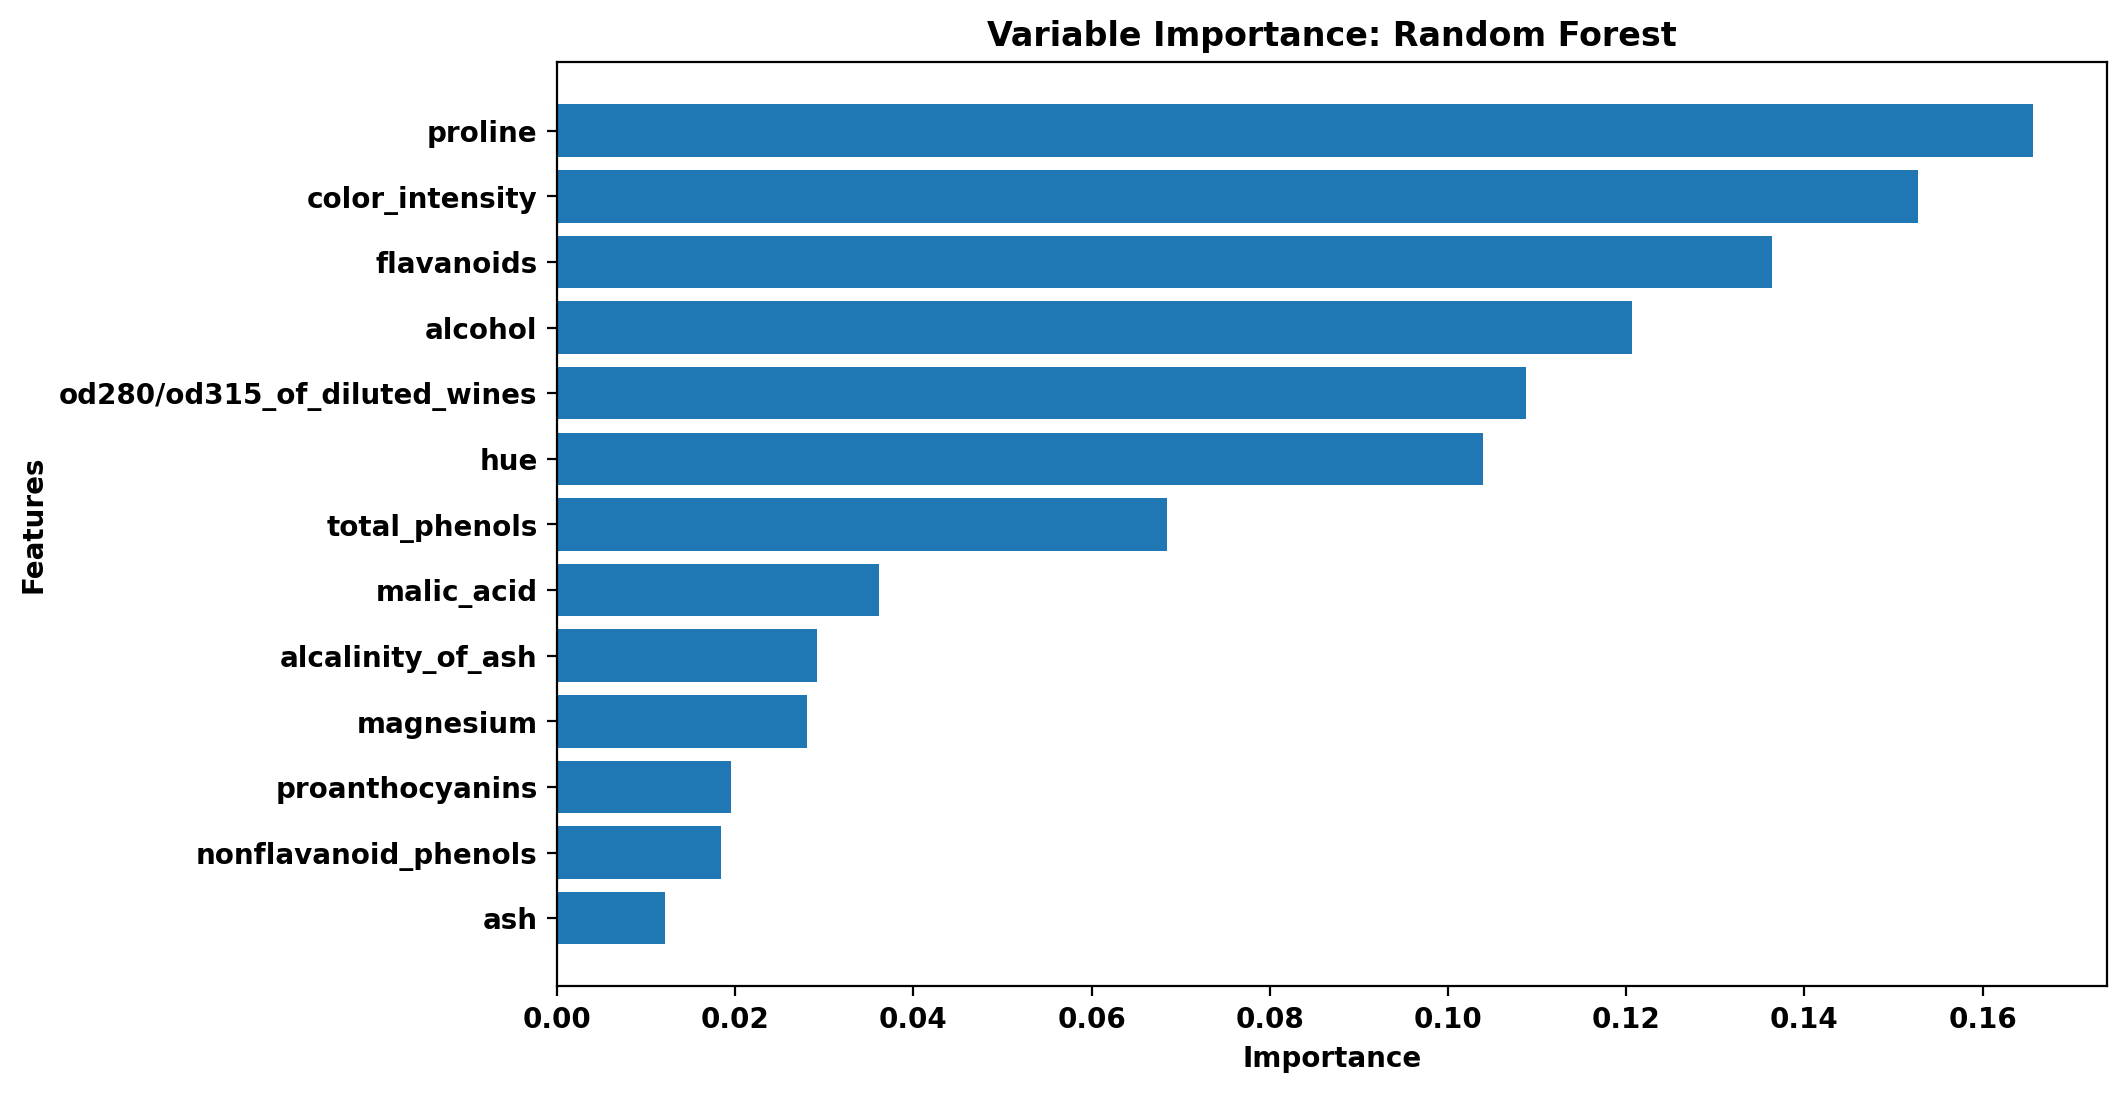

In [20]:
import numpy as np

# Plot the variable importance for Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,6), dpi=200)
plt.title("Variable Importance: Random Forest")
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), [wine.feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [23]:
from sklearn.ensemble import AdaBoostClassifier

# Create and fit an AdaBoost classifier with decision tree as the base estimator
adaboost = AdaBoostClassifier(n_estimators=100, random_state=4400)
adaboost.fit(X_train, y_train)

# Make predictions using the AdaBoost classifier
adaboost_pred = adaboost.predict(X_test)

# Calculate accuracy of the AdaBoost classifier
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
print(adaboost_accuracy)

0.8611111111111112


#### Preprocessing and hyperparameter tuning

Scaling the data is not necessary when fitting a Random Forest model. Random Forest classifiers are based on decision trees, which are not sensitive to the scale of the input features. However, it is in general recommend to handle the missing values. Random Forest models in scikit-learn do not handle missing values automatically and may produce unexpected results if missing values are present in the data.

Adaboost also does not require to scale the data, but if you have features with quite different scales, scaling them to a similar range can help improve convergence speed and stability.Similiar to random forest, AdaBoost models in scikit-learn also do not handle missing values automatically. Besides, be careful of the outliers, since they can affect the performance and convergence of the model.

Adaboost in general does not need many parameter tuning but random forest does have a couple of options: 

- n_estimators: The number of decision trees in the forest. Increasing the number of trees can improve performance but also increases computational cost.
- max_depth: The maximum depth of each decision tree. Controlling the depth helps prevent overfitting. You can set it to an integer value or None to allow trees to grow until all leaves are pure or contain minimum samples.
- min_samples_split: The minimum number of samples required to split an internal node. Higher values prevent overfitting by requiring more samples for a node to be split.
- min_samples_leaf: The minimum number of samples required to be at a leaf node. Similar to min_samples_split, higher values prevent overfitting by enforcing a minimum number of samples in each leaf.
- max_features: The number of features to consider when looking for the best split. It can be an integer, a float (representing a fraction of features), or 'sqrt' (square root of the total number of features) or 'log2' (logarithm base 2 of the total number of features).
- bootstrap: Whether to use bootstrap samples when building trees. Setting it to True (default) enables bootstrapping, while setting it to False disables it, resulting in using the entire dataset for each tree.

In [27]:
from sklearn.model_selection import GridSearchCV

X_train1, X_valid, y_train1, y_valid = train_test_split(X_train, y_train, test_size=0.5, random_state=4400)

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=4400)

# Define the parameter grid for grid search
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 3, 5], 'min_samples_leaf': [1, 3, 5],
              'max_features': ['sqrt', 'log2']}

# Perform grid search to find the best combination of parameters
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_valid, y_valid)
ccp
# Get the best estimator and its parameters
best_params = grid_search.best_params_
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train1, y_train1)

# Make predictions using the best Random Forest classifier
y_pred = best_rf.predict(X_test)

# Calculate accuracy of the best Random Forest classifier
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(best_params)

1.0
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 50}


#### imbalance data

In decision trees, the splitting process aims to maximize information gain or Gini impurity reduction. However, when dealing with imbalanced data, the majority class will dominate the splitting process, leading to biased splits that favor the majority class. This can result in poor classification of the minority class. However, using ensemble models like Random Forest or boosting algorithms like AdaBoost that can handle class imbalance to some extent. You can also set the 'class_weight' parameter to 'balanced' when fitting the model

#### Example 3: Regression 

In [35]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load the Diabetes dataset
diabetes = load_diabetes()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target,
                                                    test_size=0.2, random_state=42)

# Fit a Decision Tree regressor
reg_tree = DecisionTreeRegressor()
reg_tree.fit(X_train, y_train)


# Make predictions with the Decision Tree regressor
reg_tree_pred = reg_tree.predict(X_test)

# Calculate metrics for the Decision Tree regressor
tree_mse = mean_squared_error(y_test, reg_tree_pred)
print("Tree MSE: ", tree_mse)
tree_r2 = r2_score(y_test, reg_tree_pred)
print("Tree r2 score: ", tree_r2)

Tree MSE:  4740.134831460674
Tree r2 score:  0.10532293968593165


In [36]:
# Fit a Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=4400)
rf.fit(X_train, y_train)

# Make predictions with the Random Forest regressor
rf_pred = rf.predict(X_test)

# Calculate metrics for the Random Forest regressor
rf_mse = mean_squared_error(y_test, rf_pred)
print("RF MSE: ", tree_mse)
rf_r2 = r2_score(y_test, rf_pred)
print("RF r2 score: ", tree_r2)

# Fit an AdaBoost regressor
adaboost = AdaBoostRegressor(n_estimators=100, random_state=4400)
adaboost.fit(X_train, y_train)

# Make predictions with the AdaBoost regressor
adaboost_pred = adaboost.predict(X_test)

# Calculate metrics for the AdaBoost regressor
adaboost_mse = mean_squared_error(y_test, adaboost_pred)
print("Adaboost MSE: ", tree_mse)
adaboost_r2 = r2_score(y_test, adaboost_pred)
print("Adaboost r2 score: ", tree_r2)

RF MSE:  4740.134831460674
RF r2 score:  0.10532293968593165
Adaboost MSE:  4740.134831460674
Adaboost r2 score:  0.10532293968593165


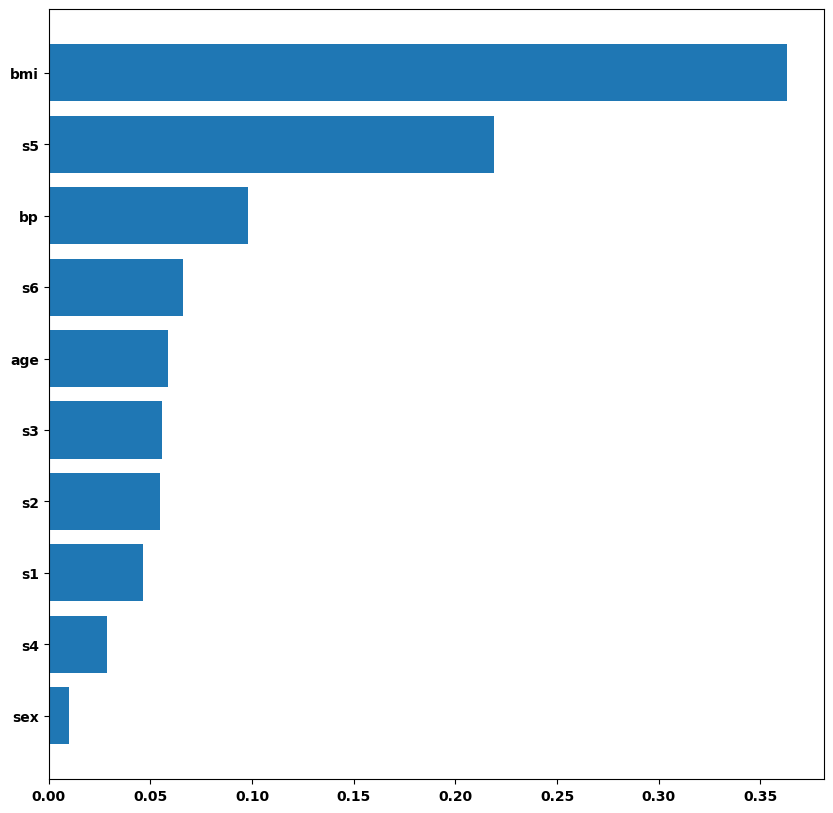

In [39]:
# Plot the variable importance for Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [diabetes.feature_names[i] for i in indices])
plt.show()

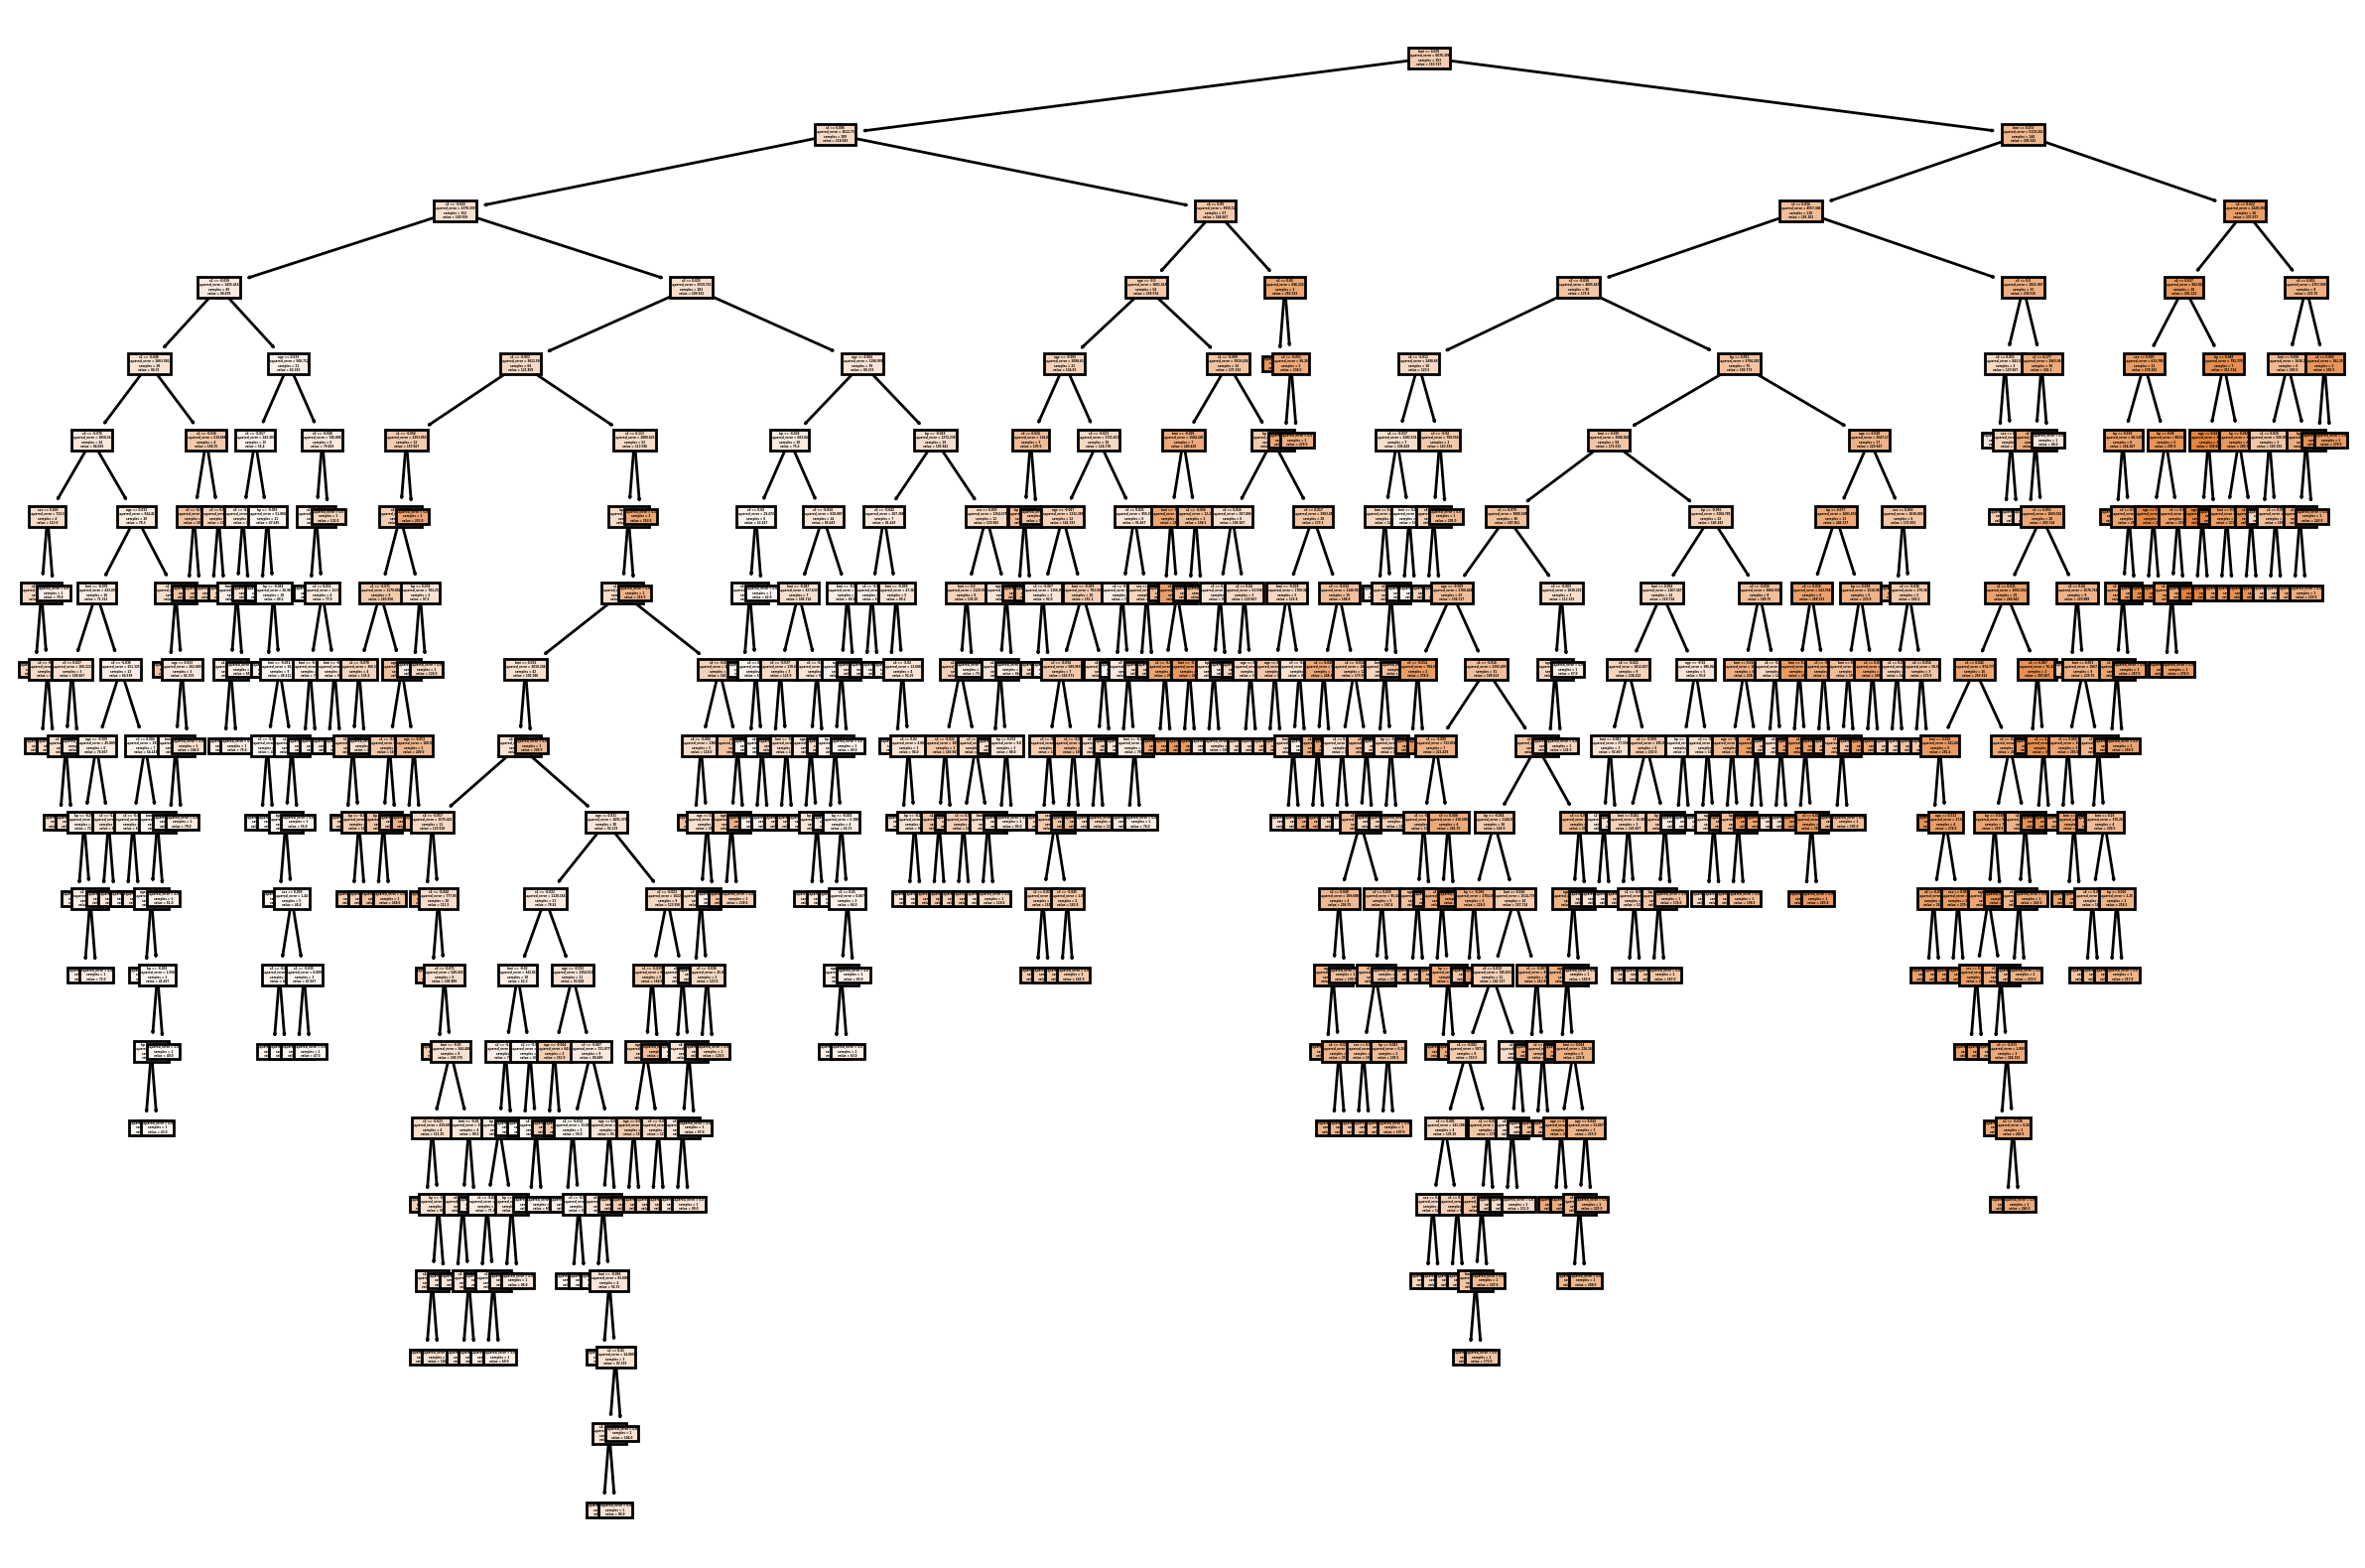

In [42]:
# Plot the Decision Tree
plt.figure(figsize=(15,10))
plot_tree(reg_tree, filled=True, feature_names=diabetes.feature_names)
plt.show()

In [56]:
import pandas as pd

diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
new_data = diabetes_df[['bmi', 's5']]
X_train, X_test, y_train, y_test = train_test_split(new_data, diabetes.target, test_size=0.2, random_state=4400)

# Fit a Decision Tree regressor
reg_tree = DecisionTreeRegressor(ccp_alpha=100, max_depth=2)
reg_tree.fit(X_train, y_train)

# Make predictions with the Decision Tree regressor
reg_tree_pred = reg_tree.predict(X_test)

# Calculate metrics for the Decision Tree regressor
tree_mse = mean_squared_error(y_test, reg_tree_pred)
print("Tree MSE: ", tree_mse)
tree_r2 = r2_score(y_test, reg_tree_pred)
print("Tree r2 score: ", tree_r2)

Tree MSE:  3487.8843254215435
Tree r2 score:  0.2810745057677121


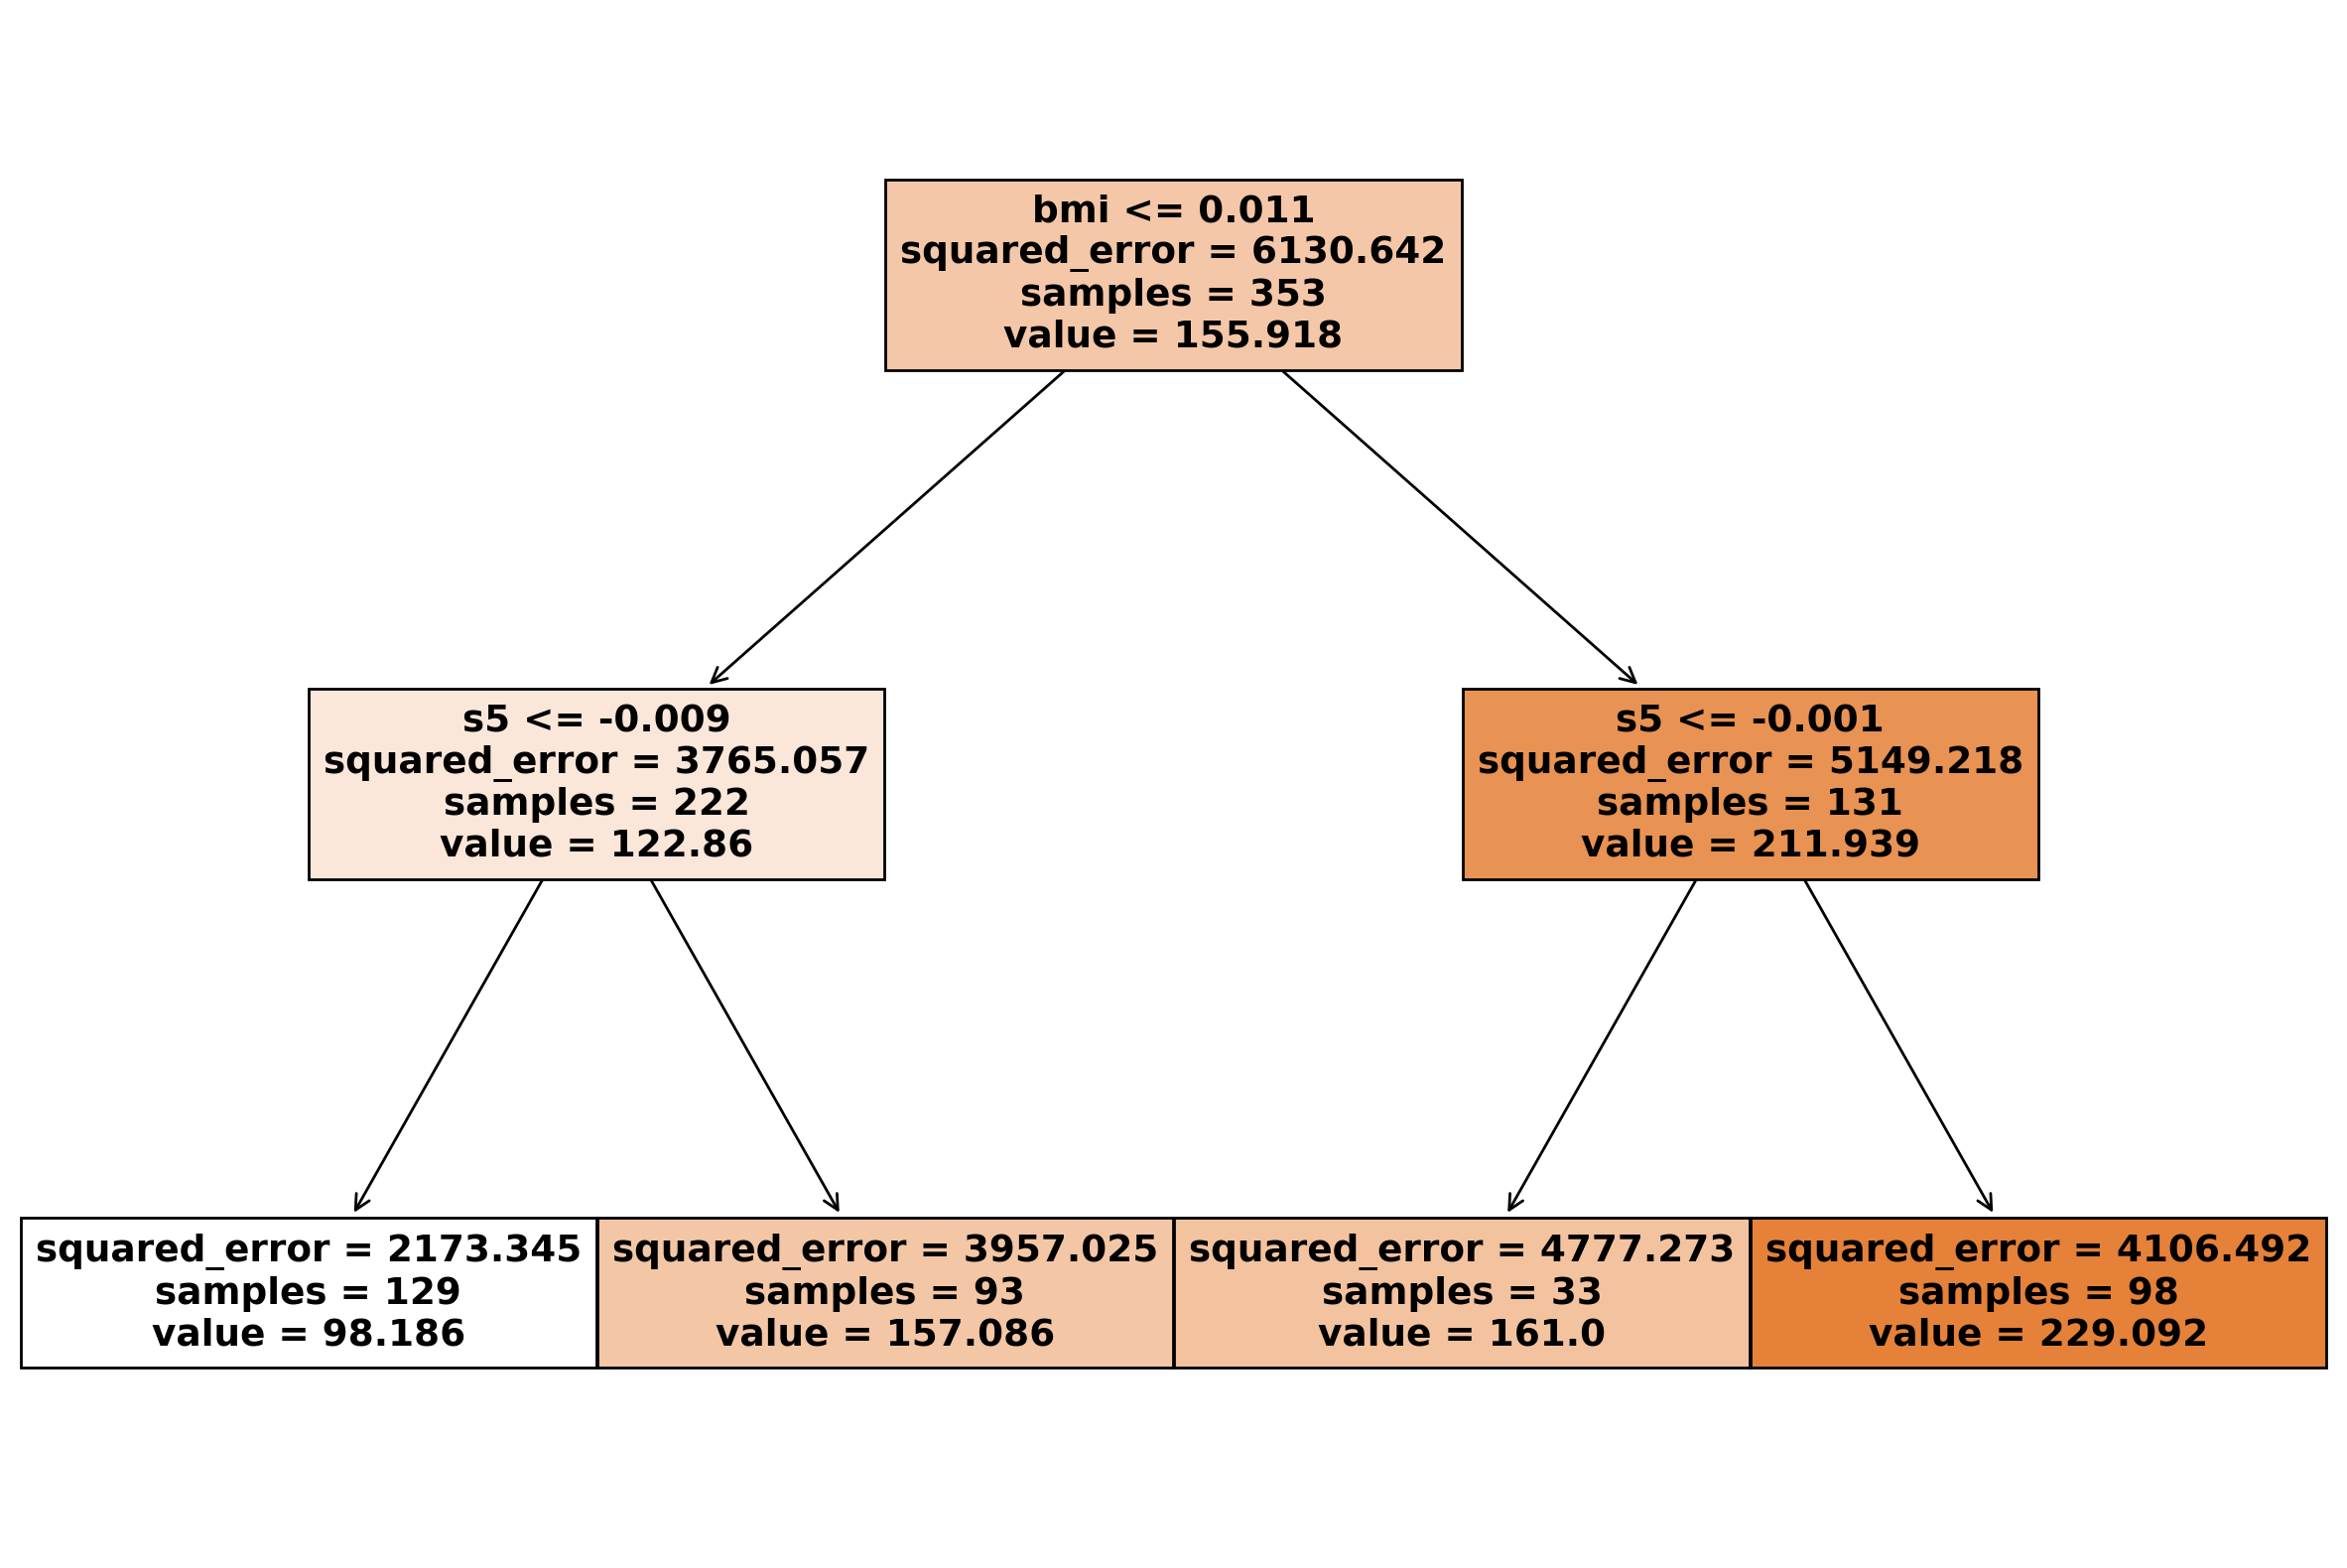

In [57]:
# Plot the Decision Tree
plt.figure(figsize=(15,10), dpi=200)
plot_tree(reg_tree, filled=True, feature_names=['bmi', 's5'])
plt.show()